<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2026/blob/main/tutorial/Tutorial_06_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 453**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

# Tutorial 6: Pandas

A quick intro to processing data with Pandas.

**References**
* https://pandas.pydata.org/docs/user_guide/10min.html
* https://pandas.pydata.org/docs/user_guide/visualization.html



# Pandas Basics

A Pandas **dataframe** is essentially a spreadsheet with rows and columns, but vastly more powerful. A good place to start learning is here: https://pandas.pydata.org/docs/user_guide/10min.html

 I'll show just a few basics below.


In [2]:
# Make a simple dataframe
x = np.linspace(0,3,4)
y = x**2
names = ['Abe','Bob','Cal','Dot']
df = pd.DataFrame({'Names':names,'x':x,'y':y})
df

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0
2,Cal,2.0,4.0
3,Dot,3.0,9.0


In [3]:
df.head(2)  # show first 2 rows, use "tail" for last rows

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0


## Columns

In [4]:
df.x  # Access a single column
# this returns a Pandas 'Series' (which is just a 1D dataframe with index and values).

,x
0,0.0
1,1.0
2,2.0
3,3.0


In [5]:
df['x']  # Another way to do the same thing

,x
0,0.0
1,1.0
2,2.0
3,3.0


In [6]:
df.x.values  # returns just the values

array([0., 1., 2., 3.])

In [7]:
# View certain columns
df[['Names','x']]   # NOTE THE DOUBLE BRACKETS!

# A normal way to do this is to make a list like cols=['x','y'], then use df[cols]

,Names,x
0,Abe,0.0
1,Bob,1.0
2,Cal,2.0
3,Dot,3.0


In [8]:
# Make a new column
df['z'] = df.x + df.y
df

,Names,x,y,z
0,Abe,0.0,0.0,0.0
1,Bob,1.0,1.0,2.0
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


## Searching Rows
We can give logical conditions to find matching rows.

Note that for combining conditions expressions MUST be in parentheses. The logical operators are: and=&, or=|, not=~


In [9]:
df[df.x>=2]  # all rows where x>=2

,Names,x,y,z
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


In [10]:
df[(df.x>=2) & (df.y>5)]

,Names,x,y,z
3,Dot,3.0,9.0,12.0


In [11]:
df[df.Names=='Bob']  # find Bob

,Names,x,y,z
1,Bob,1.0,1.0,2.0


In [12]:
df['Names'][0]

'Abe'

## Indexing Rows and Columns
To index a dataframe like a numpy array as [ROWS, COLS] use loc (labels) or iloc (integers).  The : wildcard tricks work just like numpy. Can also use at and iat for single values.

Syntax is:  ```df.loc[row numbers, 'column name']``` or ```df.iloc[row numbers, col numbers]```

In [13]:
df.loc[:,'y']  # all rows of y

,y
0,0.0
1,1.0
2,4.0
3,9.0


In [14]:
df.iloc[2:, 2]  # last rows of column 2 (y)

,y
2,4.0
3,9.0


## Indexing Summary
The rules about rows and columns are CONFUSING:

* To get a column use brackets ```df['name']``` or ```df.name```  
* Exception: a single dataframe column is a pandas series where you can use brackets to access rows (to illustrate: ```df[0]``` does NOT work, but ```df['Names'][0]``` is 'Abe').  But be careful with using [chained indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)

* To get multiple columns use double brackets: ```df[['x','y']]```

* Logical expressions query rows: ```df[df.x>=2]``` returns all columns of df with rows that match condition

* To index a dataframe like a numpy array with [ROWS, COLS] use loc, at, iloc, iat.  This is preferred to using multiple sets of brackets.





# Answering Questions

The first rule of pandas is not to talk about pandas.  The second rule is that you need to pay attention to column data types (**dtypes**) to work with data.

In [15]:
df.dtypes

,0
Names,object
x,float64
y,float64
z,float64


You can expect several kinds of columns:  
* int64 = integers
* float64 = numbers with decimal points
* category = a few discrete options (e.g. sex = male or female, species = 0 or 1) stored as text
* object = complicated stuff, usually text or mixed types
* time (dates, intervals, etc)

**Any column we want to use in sklearn needs to be an int64 or float64.**   
Later we will use built-in tools to change types.  For now, just be aware that the functions you can use depend on the type of the column.


## Numeric Columns

By default the **describe** command gives us info on numeric columns

In [16]:
df.describe()

,x,y,z
count,4.000000,4.000000,4.000000
mean,1.500000,3.500000,5.000000
std,1.290994,4.041452,5.291503
min,0.000000,0.000000,0.000000
25%,0.750000,0.750000,1.500000
50%,1.500000,2.500000,4.000000
75%,2.250000,5.250000,7.500000
max,3.000000,9.000000,12.000000


We can do all of the typical math and statistics on numerical data

In [17]:
df.z.max()

12.0

In [18]:
print('Index of largest z: ',df.z.argmax())
df.iloc[df.z.argmax()] # show entry with largest z

Index of largest z:  3


,3
Names,Dot
x,3.0
y,9.0
z,12.0


In [19]:
df[['x','y']].mean()

,0
x,1.5
y,3.5


## Category Data
In general, we can not do math with category data *even if it looks like a number!*  Instead, we use these to sort and group data.  Useful tricks for categories are **unique**, **value_counts**, and **groupby**.

In [20]:
df['Hair'] = ['Pink', 'Green', 'Pink', 'Green']

In [21]:
df.Hair.unique()

array(['Pink', 'Green'], dtype=object)

In [22]:
df.Hair.value_counts()

,count
Hair,
Pink,2
Green,2


In [23]:
df.Hair.describe() # describe works differently for categories

,Hair
count,4
unique,2
top,Pink
freq,2


# Raw Data Plots
Pandas has some nice plotting functionality:

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

We'll load up iris data to make more interesting plots.

**IMPORTANT**: remember that numbers and categories are treated differently in plotting





## Numeric Plots

In [24]:
df2 = load_iris(as_frame=True).frame

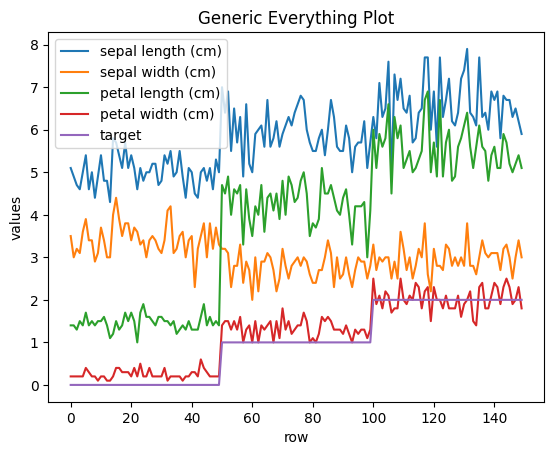

In [25]:
df2.plot()
plt.title('Generic Everything Plot')
plt.xlabel('row')
plt.ylabel('values')
plt.show()

In [26]:
df2.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

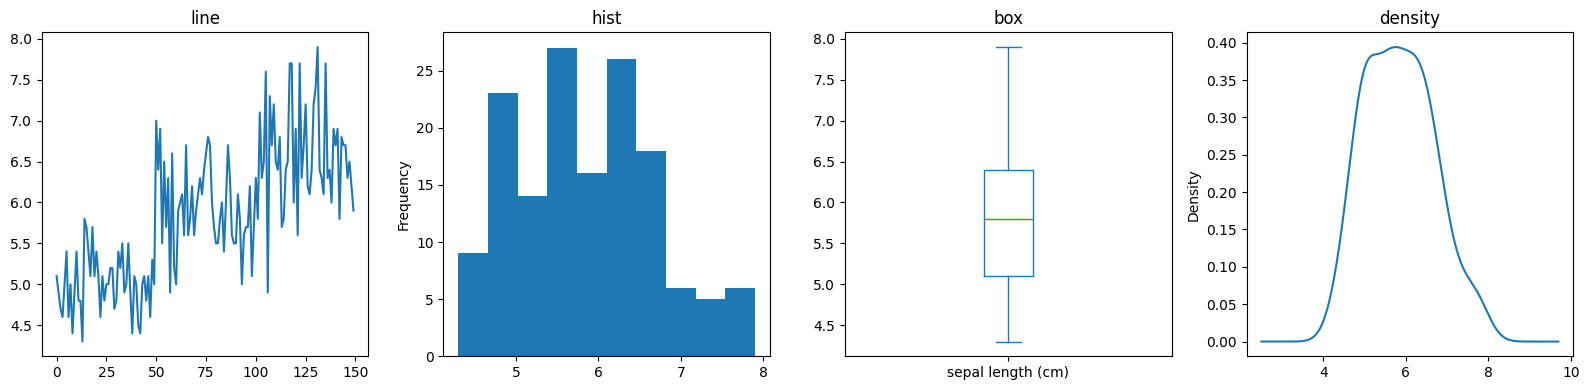

In [27]:
# Different plot kinds for a numeric distribution
plt.figure(figsize=(16,4))
kinds = ['line','hist','box','density']
NUM = len(kinds)

for i in range(NUM):
  plt.subplot(1,NUM,i+1)
  kind = kinds[i]
  df2['sepal length (cm)'].plot(kind=kind)
  plt.title(kind)

plt.tight_layout()

## Category Plots

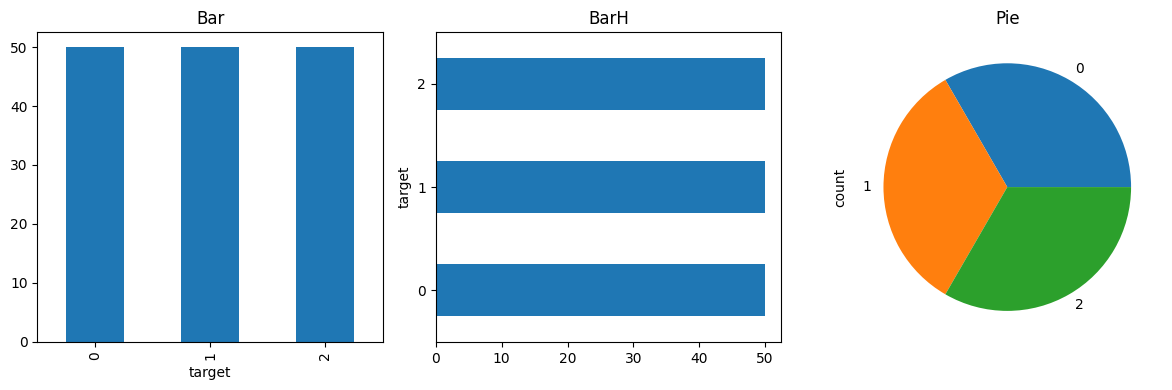

In [28]:
# Use value_counts to get histograms
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
df2.target.value_counts().plot(kind='bar')
plt.title('Bar')


plt.subplot(1,3,2)
#df_raw.pclass.value_counts().plot(kind='barh')
df2.target.value_counts().plot(kind='barh') # sorting index
plt.title('BarH')

plt.subplot(1,3,3)
df2.target.value_counts().plot(kind='pie')
plt.title('Pie')


plt.tight_layout()
plt.show()

The ```by``` keyword adds the groupby functionality to plots!

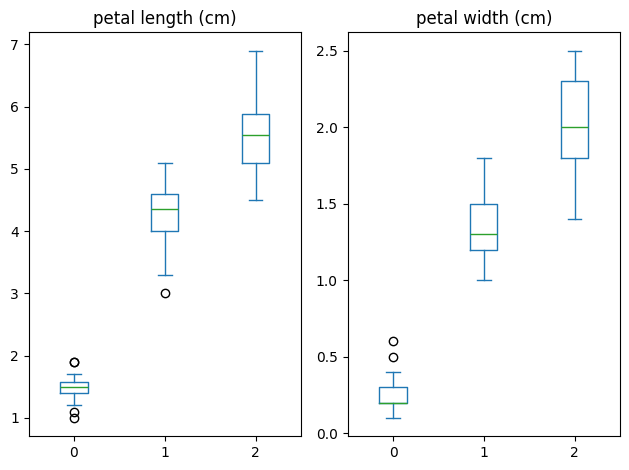

In [29]:
df2.plot.box(column=['petal length (cm)', 'petal width (cm)'], by='target')
plt.tight_layout()
plt.show()

## Scatter Plots
You can cram an amazing amount of information into a scatter plot!

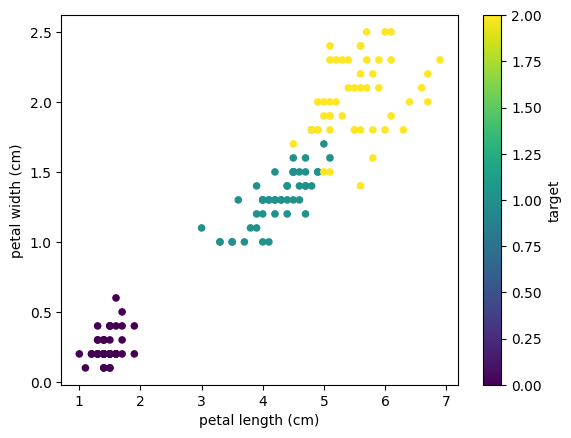

In [30]:
df2.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target', cmap='viridis')
plt.show()

Finally, there are some more advanced plotting tools that do neat things:
https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-tools

Notice that these aren't called directly from the dataframe.  Instead these functions live in pandas.plotting and the dataframes are passed as an argument.


In [35]:
pd.plotting.scatter_matrix?

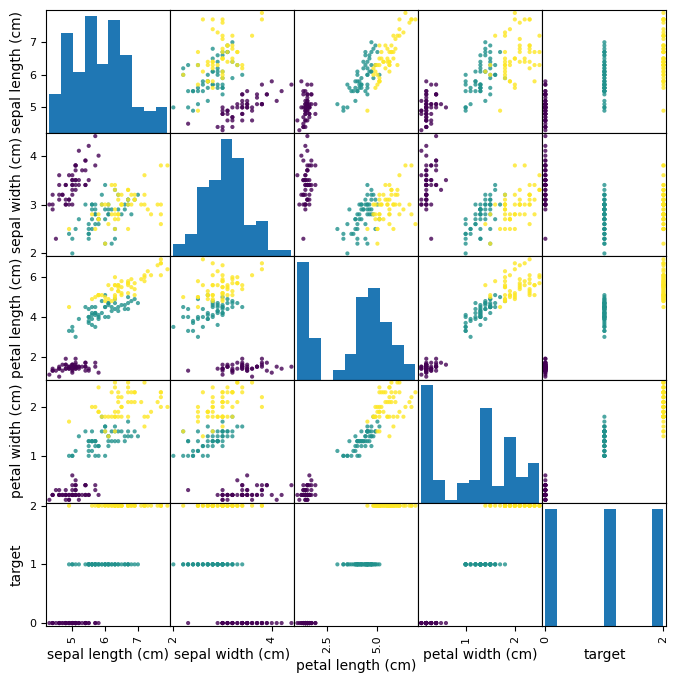

In [37]:
#plt.figure(figsize=(12,12))
pd.plotting.scatter_matrix(df2, c=df2.target, figsize=(8,8), alpha=0.8)
plt.show()